<a href="https://colab.research.google.com/github/AgusteFatu/burayaneyazcaz/blob/main/ml_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as M
import seaborn as sns
import statsmodels.api as sm

In [230]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

In [231]:
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/drug200.csv')

In [232]:
# To show a few observations of data and data length  
display(data.head())
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.36,DrugY
1,47,M,LOW,HIGH,13.09,drugC
2,47,M,LOW,HIGH,10.11,drugC
3,28,F,NORMAL,HIGH,7.80,drugX
4,61,F,LOW,HIGH,18.04,DrugY



200 Rows and 6 columns.


In [233]:
# Data Summary
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.00,44.31,16.54,15.00,31.00,45.00,58.00,74.00
Na_to_K,200.00,16.08,7.22,6.27,10.45,13.94,19.38,38.25


In [ ]:
# Type of variables
data.info()

In [234]:
# .value_counts() To show levels of a factor 
display(pd.DataFrame(data['Sex'].value_counts()).transpose())
print("")
display(pd.DataFrame(data['BP'].value_counts()).transpose())
print("")
display(pd.DataFrame(data['Cholesterol'].value_counts()).transpose())
print("")
display(pd.DataFrame(data['Drug'].value_counts()).transpose())


,M,F
Sex,104,96


,HIGH,LOW,NORMAL
BP,77,64,59


,HIGH,NORMAL
Cholesterol,103,97


,DrugY,drugX,drugA,drugC,drugB
Drug,91,54,23,16,16


In [235]:
# Select feature and target
X = data.drop(['Drug'],axis=1)
y = data[['Drug']]

In [236]:
from sklearn.preprocessing import OneHotEncoder

# Can not use OneHotEncoder for Target 
le = preprocessing.LabelEncoder()
ycoppy = y.copy()
y['Drug'] = le.fit_transform(y['Drug'])

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Encode column in a different dataframe and then add new dataframe to the old one 
enc_df = pd.DataFrame(enc.fit_transform(X[['Sex']]).toarray())
X = X.join(enc_df)
X.rename(columns={0: 'Sex_F', 1: 'Sex_M'},inplace=True)

enc_df = pd.DataFrame(enc.fit_transform(X[['BP']]).toarray())
X = X.join(enc_df)
X.rename(columns={0: 'BP_HIGH', 1: 'BP_LOW', 2:'NORMAL'},inplace=True)

enc_df = pd.DataFrame(enc.fit_transform(X[['Cholesterol']]).toarray())
X = X.join(enc_df)
X.rename(columns={0: 'Cholesterol_HIGH', 1: 'Cholesterol_NORMAL'},inplace=True)

X = X.drop(['Sex','BP','Cholesterol'],axis=1)

In [237]:
# Values after encoding 
display(X.head())
display(y.head().transpose())
display(ycoppy.head().transpose())

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.36,1.00,0.00,1.00,0.00,0.00,1.00,0.00
1,47,13.09,0.00,1.00,0.00,1.00,0.00,1.00,0.00
2,47,10.11,0.00,1.00,0.00,1.00,0.00,1.00,0.00
3,28,7.80,1.00,0.00,0.00,0.00,1.00,1.00,0.00
4,61,18.04,1.00,0.00,0.00,1.00,0.00,1.00,0.00


,0,1,2,3,4
Drug,0,3,3,4,0


,0,1,2,3,4
Drug,DrugY,drugC,drugC,drugX,DrugY


In [238]:
#Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 266)

# Train and Test data after splitting for target variable
sData = {'Train ' : y_train['Drug'].value_counts(), 'Test ' : y_test['Drug'].value_counts()}
df_2 = pd.DataFrame(sData)
df_2.index = ['DrugY:0' ,'DrugX:4','DrugA:1', 'DrugC:3','DrugB:2']
df_2.transpose()


,DrugY:0,DrugX:4,DrugA:1,DrugC:3,DrugB:2
Train,71,42,19,14,14
Test,20,12,4,2,2


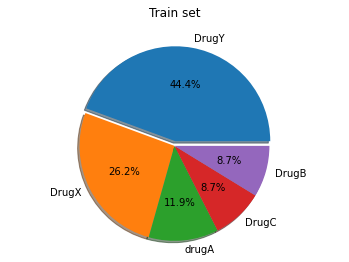

In [239]:
# To Show % of target value counts in Train set
labels = 'DrugY','DrugX','drugA','DrugC','DrugB'
explode = (0.05, 0, 0, 0,0)
 
fig1, ax1 = plt.subplots()
ax1.pie(y_train.value_counts(),explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Train set', y=1.05)
plt.show()


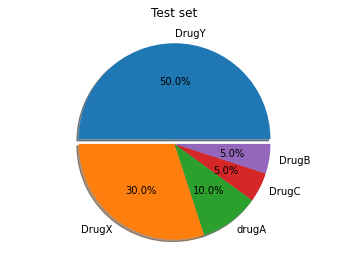

In [240]:
# To Show % of target value count in Test set
labels = 'DrugY','DrugX','drugA','DrugC','DrugB'
explode = (0.05, 0, 0, 0,0)
 
fig1, ax1 = plt.subplots()
ax1.pie(y_test.value_counts(),explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Test set', y=1.05)
plt.show()

In [241]:
# Train Model with the same fucntion LogisticRegression with multi_class='multinomial' parameter
model = LogisticRegression(multi_class='multinomial',solver="newton-cg")
model.fit(X_train,y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

modelEvaluation  = y_train.copy()
modelEvaluation['Predicted_train'] = y_train_predicted
modelEvaluation.columns = ['Actual','Predicted_train']
modelEvaluation.head(9).transpose()

,118,92,161,197,180,158,72,8,41
Actual,1,0,2,4,0,3,4,0,2
Predicted_train,1,0,2,4,0,3,4,0,2


In [242]:
# Accuary: the proportion of the total number of predictions that were correct.
print('From graph above: {}'.format(sum(np.diag(cnf_matrix_train)) / np.sum(cnf_matrix_train)) )
print("Train Accuracy :",M.accuracy_score(y_train, y_train_predicted))
print("Test Accuracy:",M.accuracy_score(y_test, y_test_predicted))

From graph above: 1.0
Train Accuracy : 1.0
Test Accuracy: 0.95


In [243]:
# sensivity: the proportion of actual positive cases which are correctly identified. 
sens_df = pd.DataFrame(M.recall_score(y_train,y_train_predicted,average=None),columns=['Sensivity Train'])
sens_df2 = pd.DataFrame(M.recall_score(y_test,y_test_predicted,average=None),columns=['Sensivity Test'])
sens_df = sens_df.join(sens_df2)
sens_df.index= ['DrugY:0' ,'DrugA:1', 'DrugB:2','DrugC:3','DrugX:4']
sens_df.transpose()

,DrugY:0,DrugA:1,DrugB:2,DrugC:3,DrugX:4
Sensivity Train,1.00,1.00,1.00,1.00,1.00
Sensivity Test,0.95,1.00,0.50,1.00,1.00


In [244]:
from imblearn.metrics import specificity_score as spec_score
# Specificity the proportion of actucal negative cases which are correctly identified
spec_df = pd.DataFrame(spec_score(y_train, y_train_predicted,average = None),columns=['Specificity Train'])
spec_df2 = pd.DataFrame(spec_score(y_test, y_test_predicted,average = None),columns=['Specificity Test'])
spec_df = spec_df.join(spec_df2)
spec_df.index= ['DrugY:0' ,'DrugA:1', 'DrugB:2','DrugC:3','DrugX:4']
spec_df.transpose()



,DrugY:0,DrugA:1,DrugB:2,DrugC:3,DrugX:4
Specificity Train,1.00,1.00,1.00,1.00,1.00
Specificity Test,1.00,0.97,0.97,1.00,1.00


Text(0.5, 257.44, 'Predicted label')

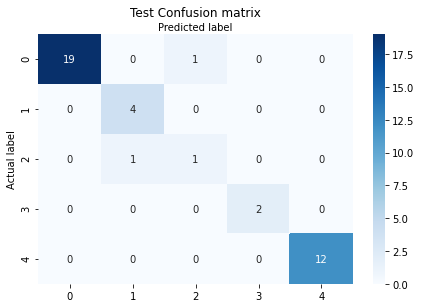

In [245]:
# Confusion Matrix
cnf_matrix_train = metrics.confusion_matrix(y_train, y_train_predicted)
cnf_matrix_test = metrics.confusion_matrix(y_test, y_test_predicted)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap 

#sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True,cmap="Blues",fmt = "g")
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True,cmap="Blues",fmt = "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
# coefficients
coef = pd.DataFrame(np.exp(model.coef_))
coef.index =['DrugY:0' ,'DrugA:1', 'DrugB:2','DrugC:3','DrugX:4']
coef.columns = X.columns
coef

In [ ]:
# Model Sumamry
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
result=logit_model.fit()
stats1=result.summary()
print(stats1)


In [250]:
# Model with LabelEncoder
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/drug200.csv')

X = data.drop(['Drug'],axis=1)
y = data[['Drug']]

le = preprocessing.LabelEncoder()

y['Drug'] = le.fit_transform(y['Drug'])
for feature in cols:
  if X[feature].dtypes == ('O'):
    X[feature] = le.fit_transform(X[feature])
    print('"{}"  data type is Object, "{}" encoded.'.format(feature,feature))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state = 42)

model = LogisticRegression(multi_class='multinomial',solver="newton-cg")
model.fit(X_train,y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print("Train Accuracy :",metrics.accuracy_score(y_train, y_train_predicted))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_test_predicted))

"Sex"  data type is Object, "Sex" encoded.
"BP"  data type is Object, "BP" encoded.
"Cholesterol"  data type is Object, "Cholesterol" encoded.
Train Accuracy : 0.96875
Test Accuracy: 0.9


In [ ]:
list(X_test.index)